In [10]:
graph = {
    '5':['3','7'],
    '3':['2','4'],
    '7':['8'],
    '2':[],
    '4':['8'],
    '8':[],
}

In [11]:
visited = [] # List for visited nodes.
queue = [] #Initialize a queue
def bfs(visited, graph, node): #function for BFS
    visited.append(node)
    queue.append(node)
    while queue: # Creating loop to visit each node
        m = queue.pop(0)
        print (m, end = " ")
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

In [12]:
# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, '5') # function calling

Following is the Breadth-First Search
5 3 7 2 4 8 

In [13]:
pip install networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


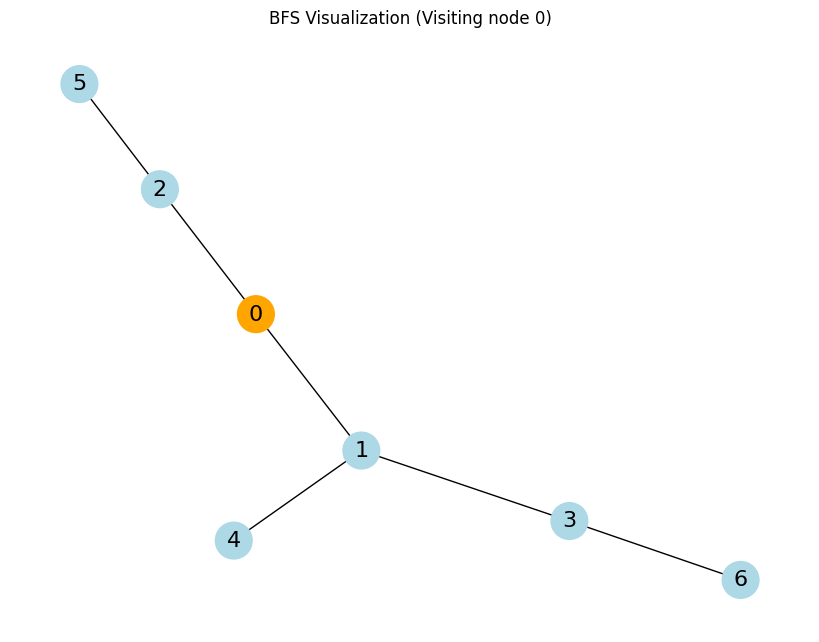

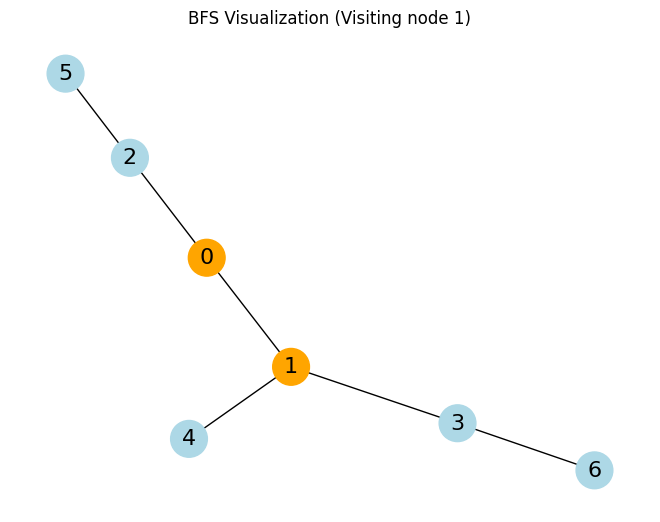

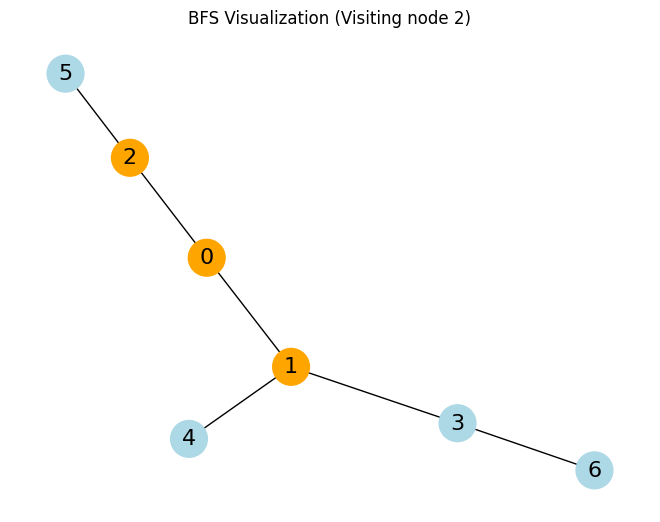

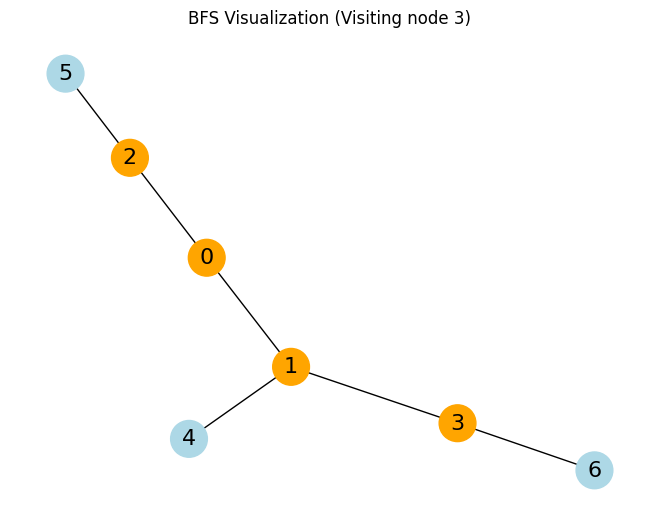

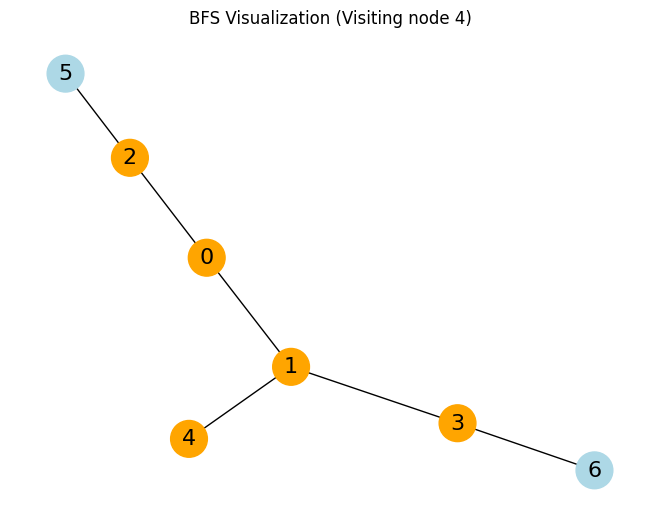

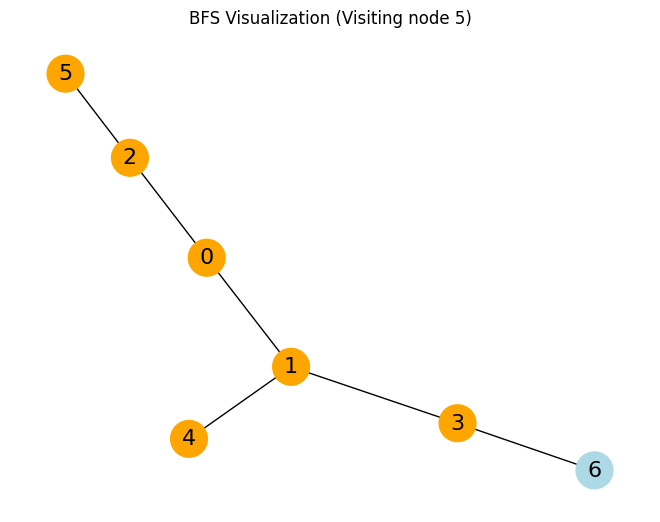

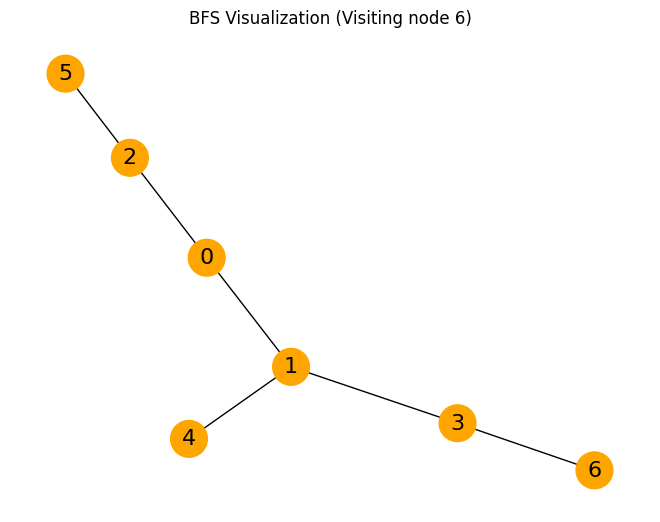

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Create a sample graph
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (3, 6)]
G.add_edges_from(edges)

def bfs_visualization(G, start):
    visited = set()
    queue = deque([start])
    levels = {start: 0}
    
    pos = nx.spring_layout(G)
    colors = ['lightblue'] * len(G.nodes())
    color_map = {}

    plt.figure(figsize=(8, 6))
    
    while queue:
        node = queue.popleft()
        visited.add(node)

        # Color the node being visited
        color_map[node] = 'orange'
        colors = [color_map.get(n, 'lightblue') for n in G.nodes()]

        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)
        plt.title(f"BFS Visualization (Visiting node {node})")
        plt.pause(1)  # Pause for a second to visualize

        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                levels[neighbor] = levels[node] + 1

    plt.show()

bfs_visualization(G, 0)


Following is the Breadth-First Search


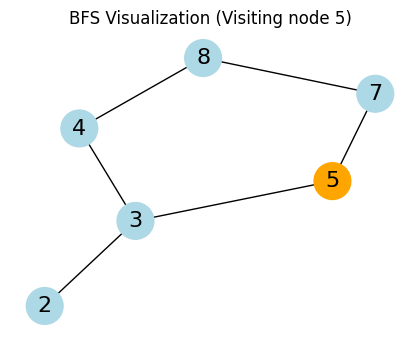

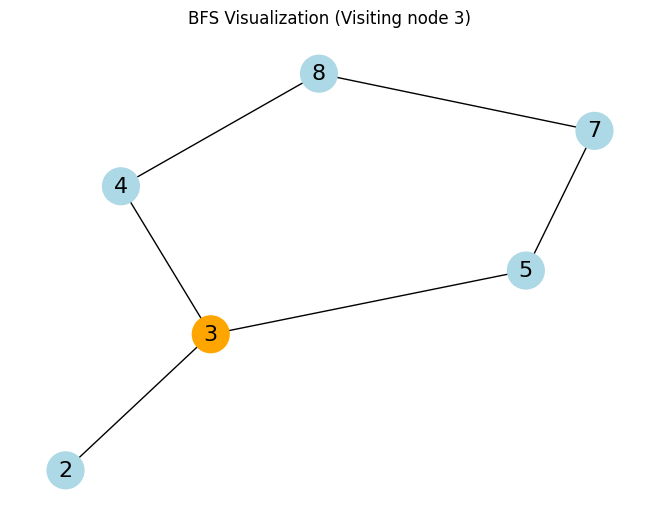

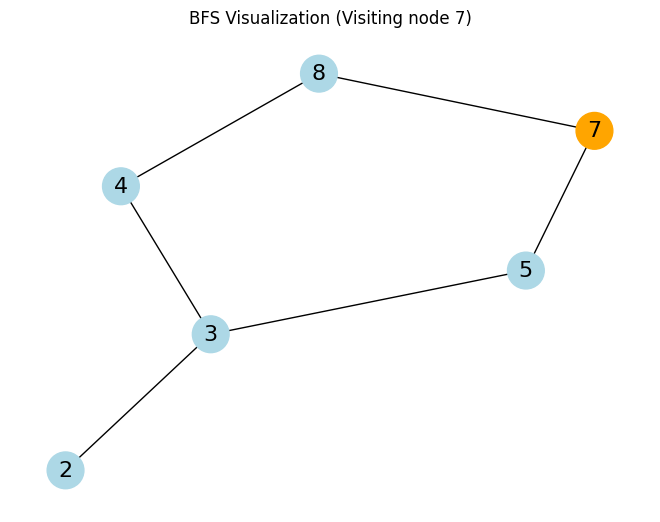

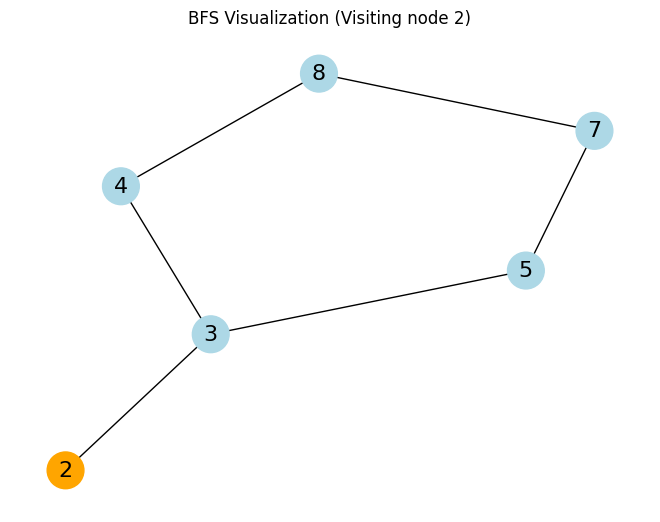

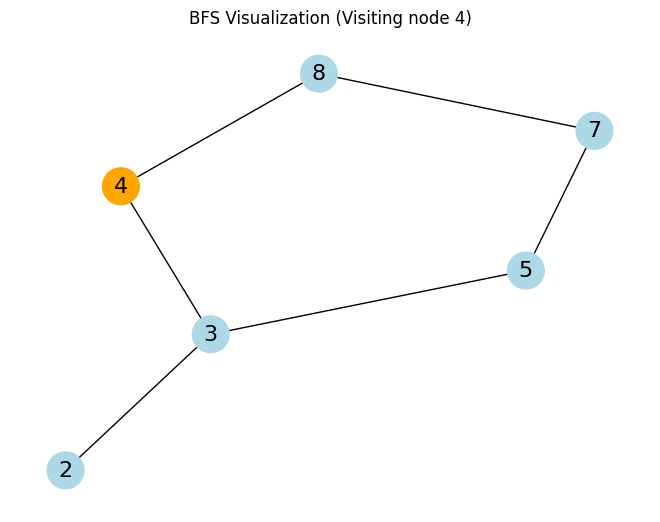

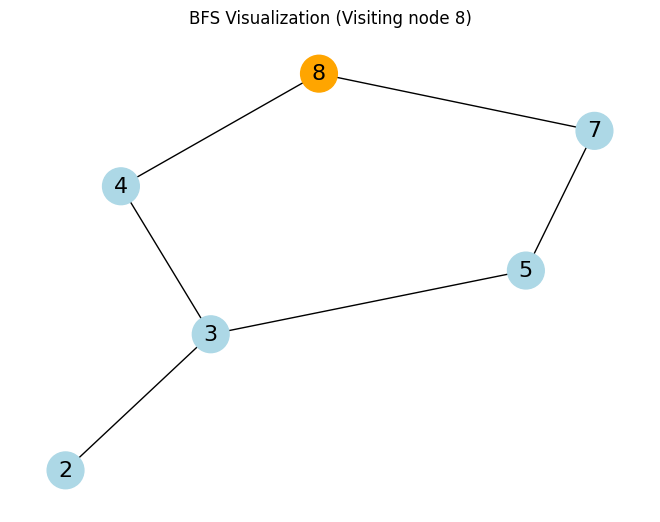

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a directed graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque()  # Initialize a queue
    queue.append(start)  # Start from the initial node
    plt.figure(figsize=(4, 3))

    pos = nx.spring_layout(G)  # Positioning of nodes

    while queue:  # Loop to visit each node
        m = queue.popleft()
        visited.append(m)

        # Color the node being visited
        colors = ['orange' if node == m else 'lightblue' for node in G.nodes()]

        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)
        plt.title(f"BFS Visualization (Visiting node {m})")
        plt.pause(1)  # Pause to visualize the current state

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling


Following is the Breadth-First Search


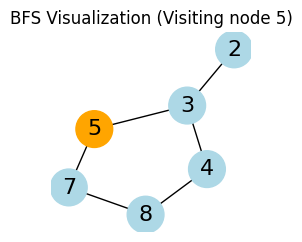

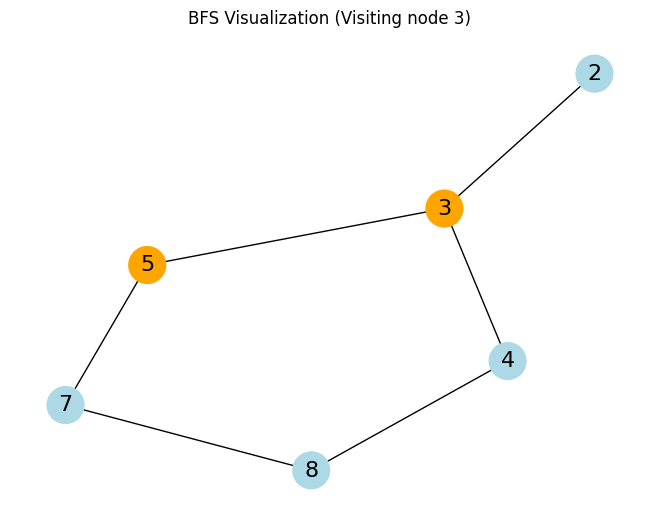

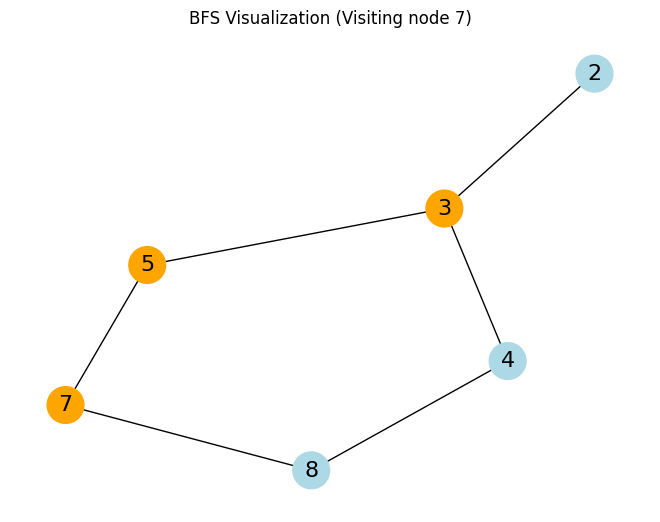

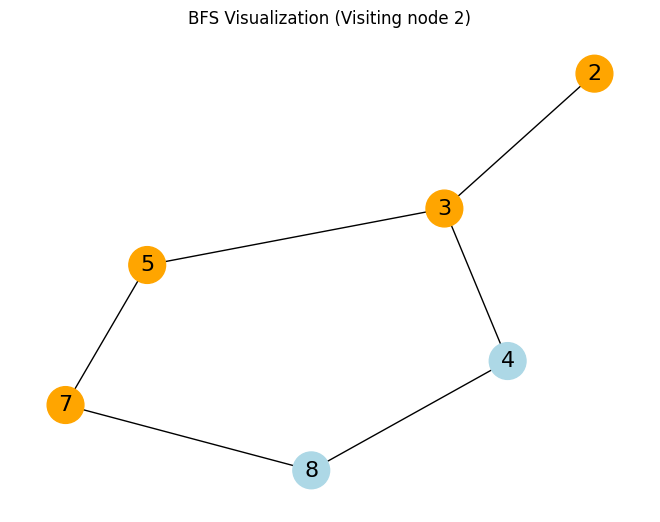

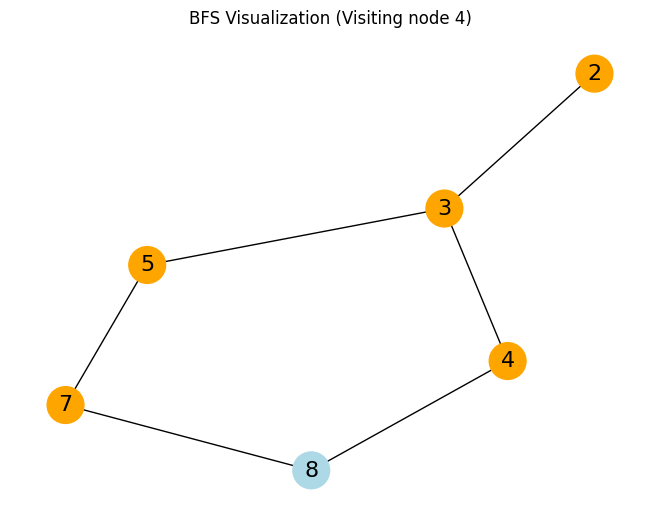

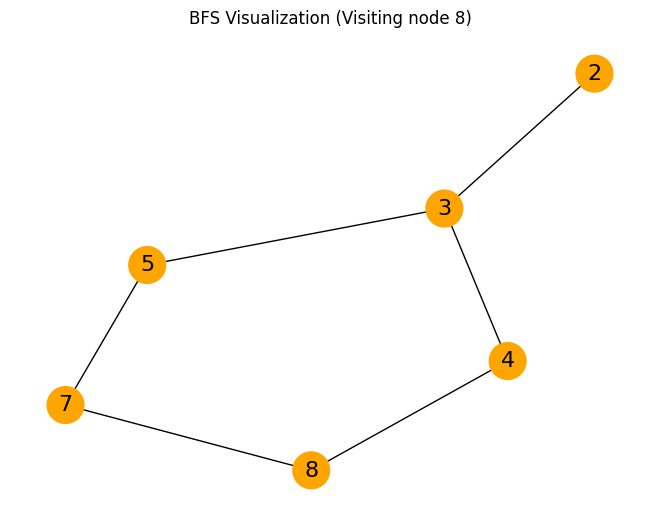

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque()  # Initialize a queue
    queue.append(start)  # Start from the initial node
    plt.figure(figsize=(2, 2))

    pos = nx.spring_layout(G)  # Positioning of nodes

    while queue:  # Loop to visit each node
        m = queue.popleft()
        visited.append(m)

        # Color nodes: orange for visited, light blue for not visited
        colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)
        plt.title(f"BFS Visualization (Visiting node {m})")
        plt.pause(1)  # Pause to visualize the current state

        for neighbour in graph[m]:
            if neighbour not in visited and neighbour not in queue:  # Ensure not revisiting
                queue.append(neighbour)

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling


Following is the Breadth-First Search


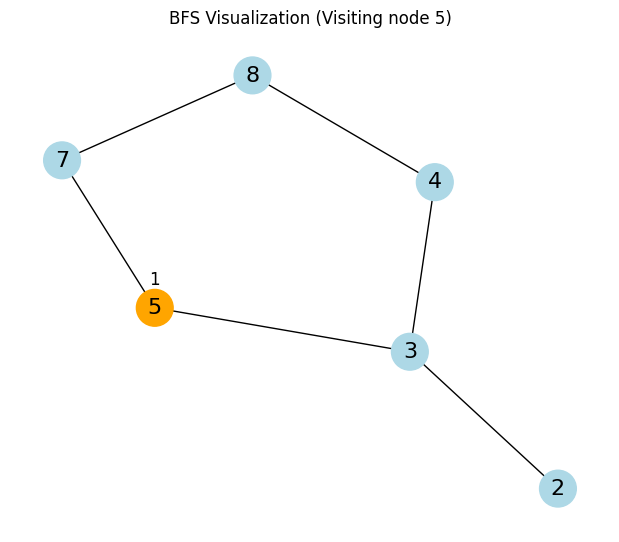

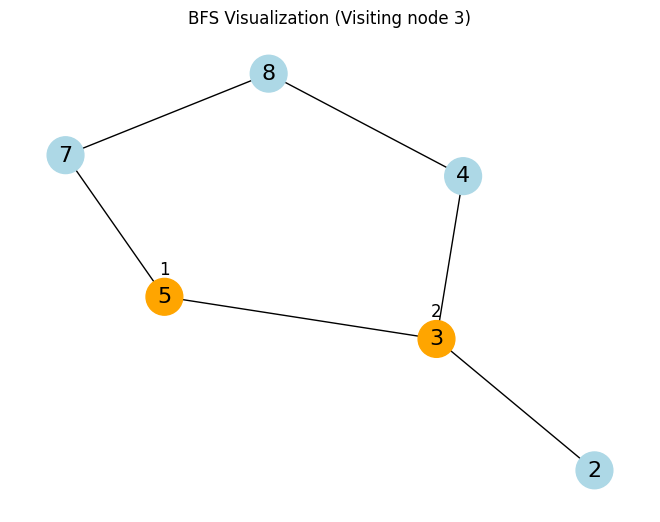

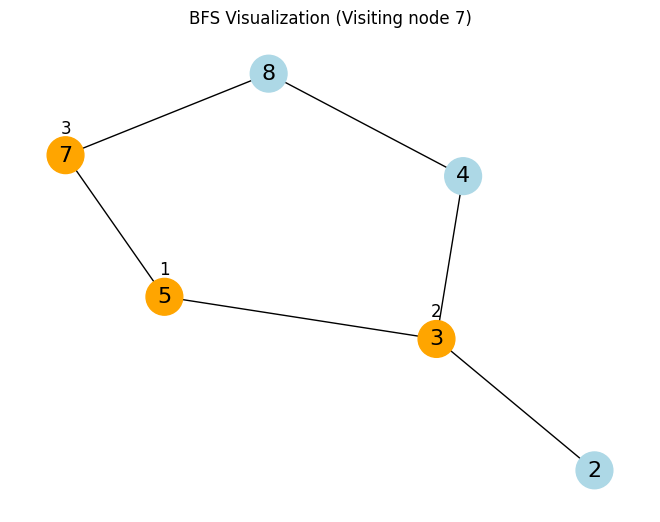

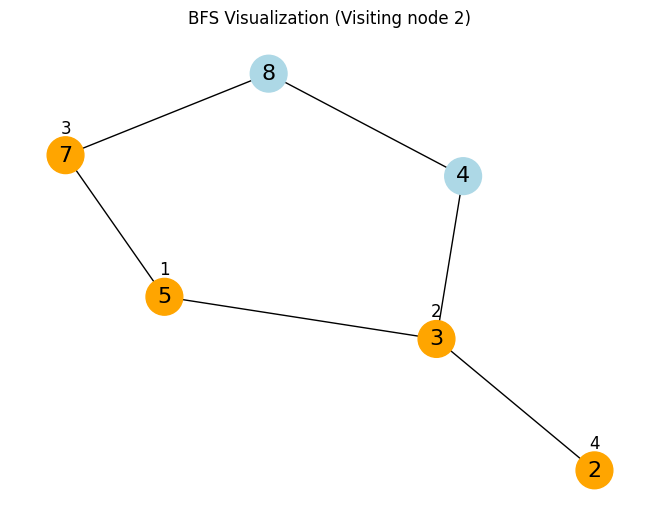

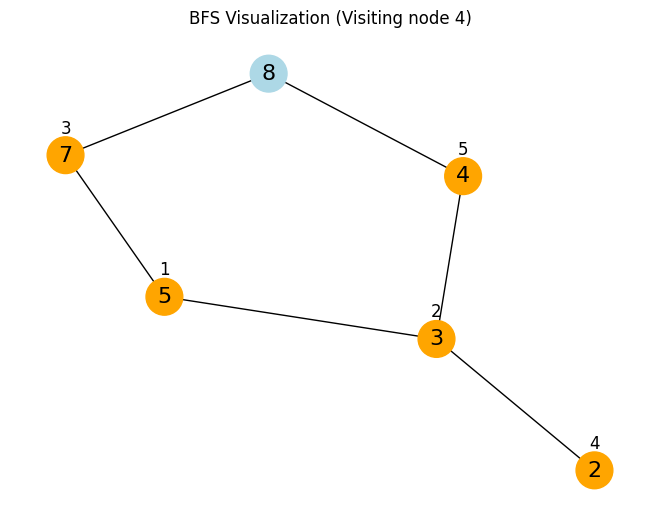

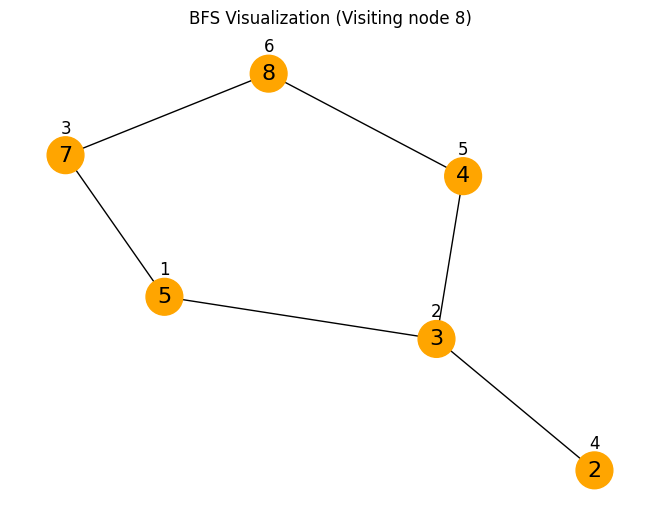

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def bfs_visualization(graph, start):
    visited = []  # List for visited nodes
    queue = deque()  # Initialize a queue
    queue.append(start)  # Start from the initial node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    while queue:  # Loop to visit each node
        m = queue.popleft()
        visited.append(m)
        visit_count += 1  # Increment the visit count

        # Color nodes: orange for visited, light blue for not visited
        colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

        # Annotate the visited node with its visit number
        for v in visited:
            x, y = pos[v]
            plt.text(x, y + 0.1, str(visited.index(v) + 1), fontsize=12, ha='center', color='black')

        plt.title(f"BFS Visualization (Visiting node {m})")
        plt.pause(1)  # Pause to visualize the current state

        for neighbour in graph[m]:
            if neighbour not in visited and neighbour not in queue:  # Ensure not revisiting
                queue.append(neighbour)

    plt.show()

# Driver Code
print("Following is the Breadth-First Search")
bfs_visualization(graph, '5')  # Function calling
